## testing pacman stuff.

In [105]:
from fastai.tabular import * 
x = np.arange(36)
df = pd.read_csv('data/trainingData.csv',sep=';')
#df = df.drop(['AA','BB','CC','DD','EE','FF','GG','HH','II','JJ','KK'], axis=1)
df = df.drop(['B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','X','Y','Z','HH','KK'], axis=1)
df.head(5)

,A,AA,BB,CC,DD,EE,FF,GG,II,JJ
0,LEFT,-1.0,0.33,-1.0,0.33,1.0,1.0,-0.000773,0.004640,0.051044
1,LEFT,-1.0,0.33,-1.0,0.33,1.0,1.0,-0.000773,0.003867,0.050271
2,LEFT,-1.0,0.33,-1.0,0.33,1.0,1.0,-0.000773,0.003094,0.049497
3,LEFT,-1.0,0.33,-1.0,0.33,1.0,1.0,-0.000773,0.002320,0.048724
4,LEFT,-1.0,0.33,-1.0,0.33,1.0,1.0,-0.000773,0.001547,0.047951


In [106]:
procs = [FillMissing, Categorify, Normalize]
#valid_idx = range(len(df)-2000, len(df))
valid_idx = list(np.random.randint(0,len(df),int(len(df)*0.1)))
dep_var = 'A'
#cat_names = ['J', 'K', 'L', 'M', 'N','S','T','U','V','Z']

In [112]:
learn = tabular_learner(data, layers=[30,30], metrics=accuracy,callback_fns=ShowGraph)
#%time learn.fit_one_cycle(20)
%time learn.fit(30)

epoch,train_loss,valid_loss,accuracy


KeyboardInterrupt: 

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/anaconda3/lib/python3.7/

In [100]:
learn.predict(df.iloc[100])

(Category UP, tensor(3), tensor([0.0657, 0.0237, 0.2787, 0.6320]))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


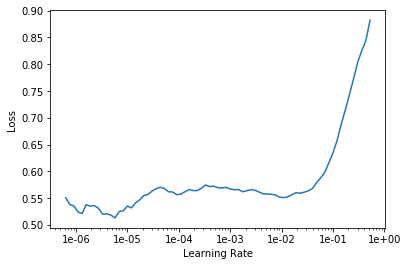

In [94]:
learn.lr_find()
learn.recorder.plot()

In [87]:
data = TabularDataBunch.from_df('path', df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)
print("cont columns")
print(data.train_ds.cont_names)  # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}
print("cat columns")
print(data.train_ds.cat_names)

cont columns
['I', 'G', 'R', 'Q', 'E', 'X', 'F', 'O', 'P', 'H', 'Y', 'C', 'B', 'D']
cat columns
['J', 'K', 'L', 'M', 'N', 'S', 'T', 'U', 'V', 'Z']


In [115]:
?learn.lr_find()

Object `learn.lr_find()` not found.
